In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
# Carregar dados de um arquivo XML
df = pd.read_csv('dadosacoes.csv',sep=',') # importa a base de dados

In [ ]:
# Exibir as primeiras linhas para verificar os dados
print("Dados iniciais:")
print(df.head())


# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Tratar valores ausentes, removendo
df.dropna(inplace=True)


# Exibir as primeiras linhas após o pré-processamento
print("\nDados após o pré-processamento:")
print(df.head())

Dados iniciais:
  Nome ação  Preço ação  Qtde de cotas  Valor de mercado R$ -(Bilhões)
0     VALE3         194             45                            2134
1     SUZB3          91             71                            3069
2     SUZB3         165             41                            2815
3     SUZB3          56             34                            3613
4    GOOGLE         212              9                            2975

Valores ausentes por coluna:
Nome ação                         0
Preço ação                        0
Qtde de cotas                     0
Valor de mercado R$ -(Bilhões)    0
dtype: int64

Dados após o pré-processamento:
  Nome ação  Preço ação  Qtde de cotas  Valor de mercado R$ -(Bilhões)
0     VALE3         194             45                            2134
1     SUZB3          91             71                            3069
2     SUZB3         165             41                            2815
3     SUZB3          56             34                

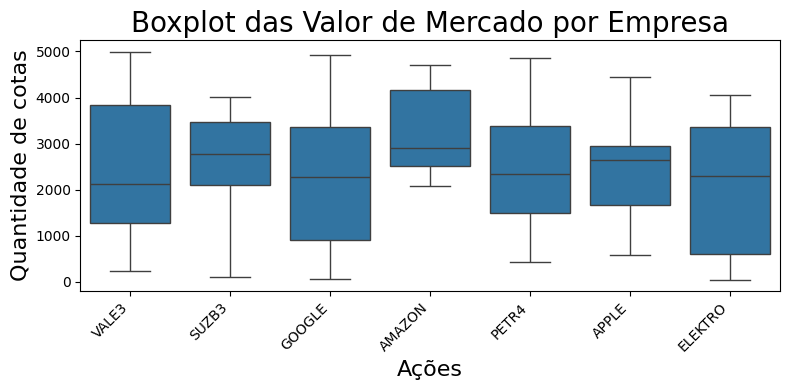

In [16]:
#criação do bloxplot por cada ação
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Nome ação', y='Valor de mercado R$ -(Bilhões)')

# configurações do gráfico
plt.xlabel('Ações', fontsize=16)
plt.ylabel('Quantidade de cotas', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Boxplot das Valor de Mercado por Empresa", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Nome ação                       100 non-null    object
 1   Preço ação                      100 non-null    int64 
 2   Qtde de cotas                   100 non-null    int64 
 3   Valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


In [18]:
# Exibir estatísticas descritivas das colunas numéricas
print(df.describe())


       Preço ação  Qtde de cotas  Valor de mercado R$ -(Bilhões)
count  100.000000     100.000000                       100.00000
mean   136.140000      52.010000                      2433.70000
std     75.237942      27.475791                      1397.29373
min     15.000000       2.000000                        52.00000
25%     67.000000      28.250000                      1189.25000
50%    121.500000      55.500000                      2433.00000
75%    209.000000      76.500000                      3616.50000
max    253.000000      97.000000                      4993.00000


In [24]:


# Exibindo o DataFrame original
print("DataFrame Original:")
print(df)

# Transformando a coluna categórica 'Nome ação' para variáveis binárias
df_dummies = pd.get_dummies(df, columns=['Nome ação'], drop_first=True)

# Exibindo o DataFrame com as variáveis binárias
print("\nDataFrame com as Variáveis Binárias:")
print(df_dummies)

DataFrame Original:
   Nome ação  Preço ação  Qtde de cotas  Valor de mercado R$ -(Bilhões)  \
0      VALE3         194             45                            2134   
1      SUZB3          91             71                            3069   
2      SUZB3         165             41                            2815   
3      SUZB3          56             34                            3613   
4     GOOGLE         212              9                            2975   
..       ...         ...            ...                             ...   
95     SUZB3         208             78                            3035   
96     VALE3         253             60                            3263   
97    GOOGLE          99             35                             980   
98     VALE3          82             43                            1866   
99     VALE3         111             19                             230   

    Cluster  Cluster_5  Cluster_8  
0         3          3          4  
1      

In [27]:

# Selecione as colunas que serão usadas no K-means (por exemplo, preço da ação, quantidade de cotas, valor de mercado)
X = df[['Preço ação', 'Qtde de cotas', 'Valor de mercado R$ -(Bilhões)']]

# Normalizar os dados para evitar que uma variável tenha mais peso do que as outras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializando o modelo K-means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os primeiros registros com a coluna de clusters
print(df.head())

# (a) Alterar o número de clusters para 5 e verificar os grupos formados
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['Cluster_5'] = kmeans_5.fit_predict(X_scaled)
print(df.head())

# (b) Alterar o número de clusters para 8 e verificar os grupos formados
kmeans_8 = KMeans(n_clusters=8, random_state=42)
df['Cluster_8'] = kmeans_8.fit_predict(X_scaled)
print(df.head())


  Nome ação  Preço ação  Qtde de cotas  Valor de mercado R$ -(Bilhões)  \
0     VALE3         194             45                            2134   
1     SUZB3          91             71                            3069   
2     SUZB3         165             41                            2815   
3     SUZB3          56             34                            3613   
4    GOOGLE         212              9                            2975   

   Cluster  Cluster_5  Cluster_8  
0        3          3          4  
1        1          4          2  
2        0          0          6  
3        0          0          0  
4        0          0          6  
  Nome ação  Preço ação  Qtde de cotas  Valor de mercado R$ -(Bilhões)  \
0     VALE3         194             45                            2134   
1     SUZB3          91             71                            3069   
2     SUZB3         165             41                            2815   
3     SUZB3          56             34           

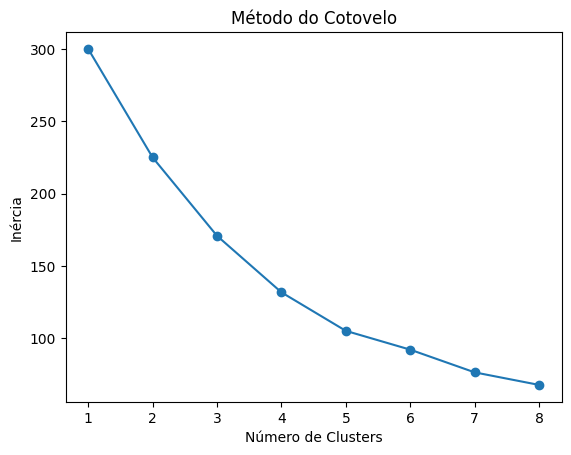

In [28]:
inertias = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 9), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

Valor médio para 2 clusters: 0.237


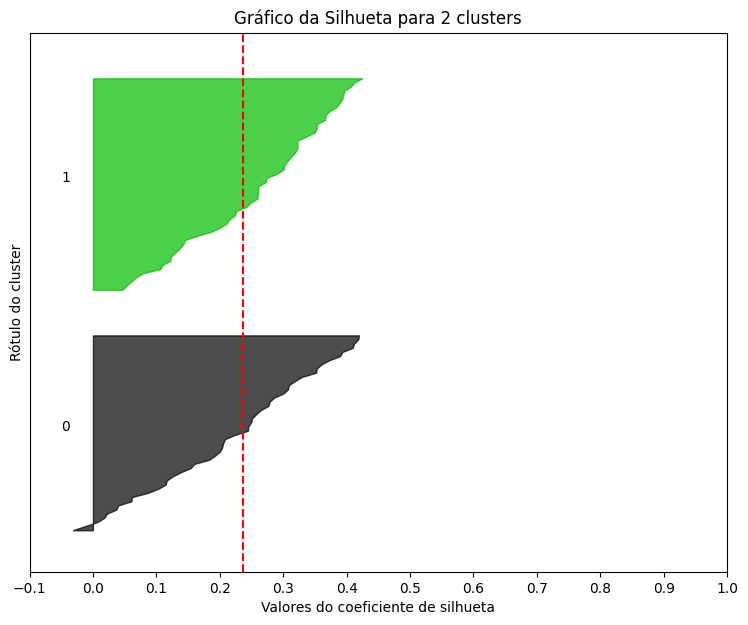

Valor médio para 3 clusters: 0.262


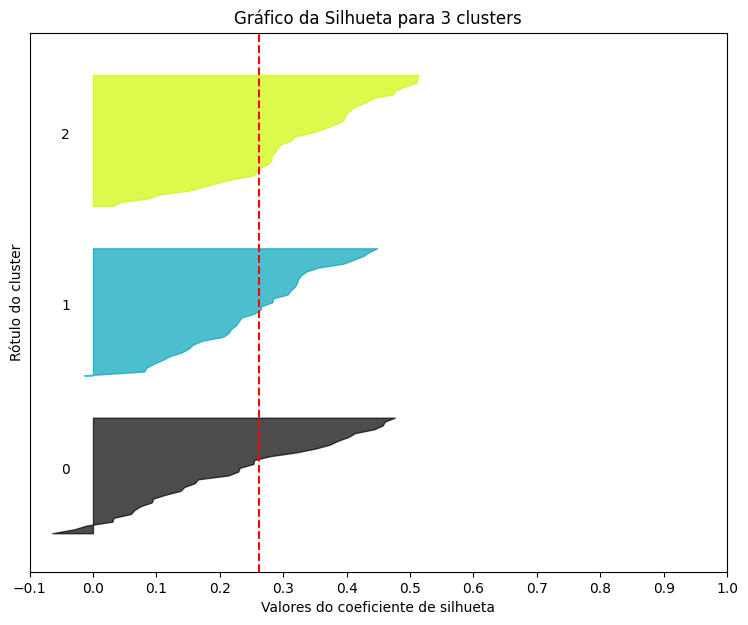

Valor médio para 4 clusters: 0.273


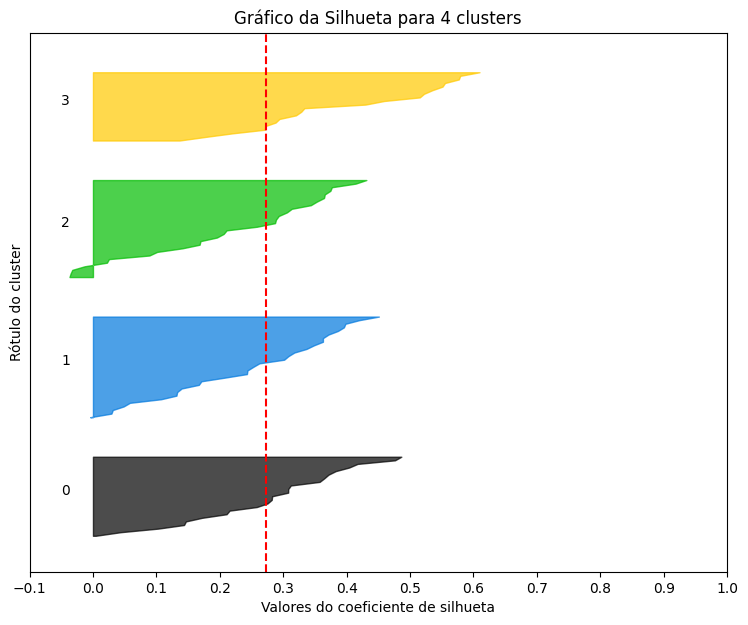

Valor médio para 5 clusters: 0.298


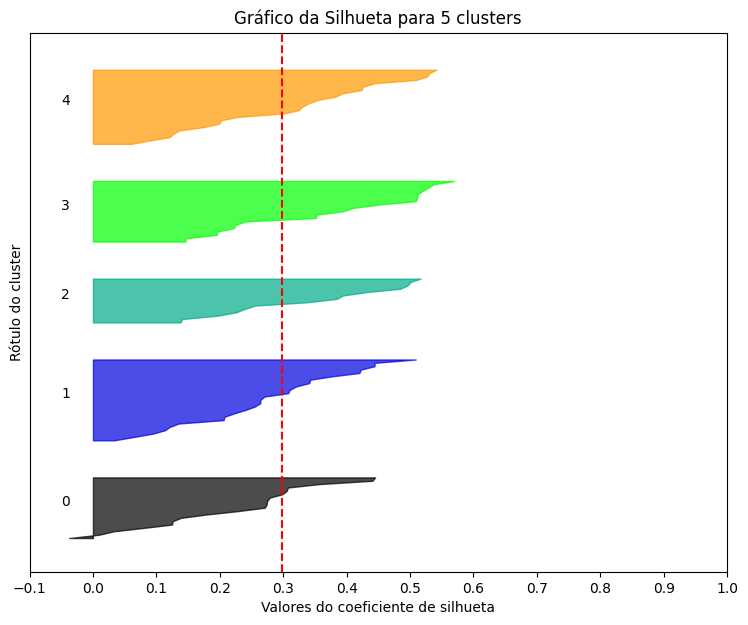

Valor médio para 6 clusters: 0.286


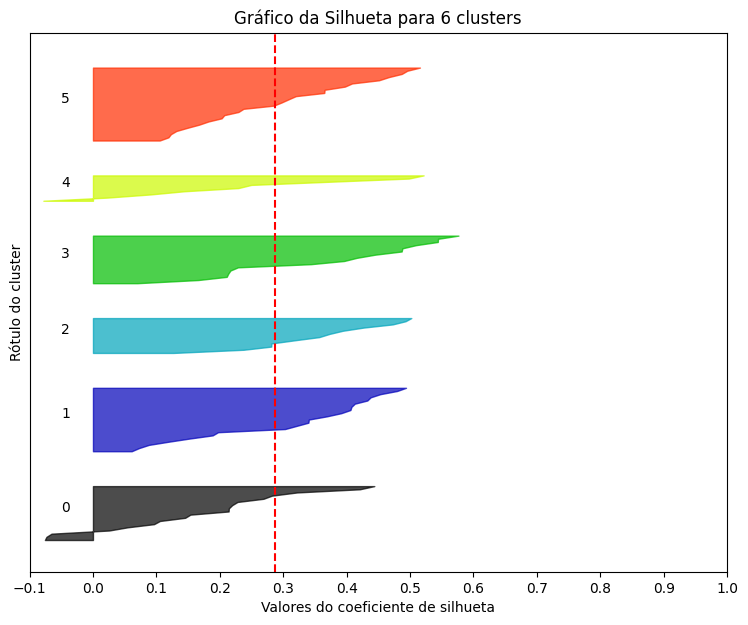

Valor médio para 7 clusters: 0.301


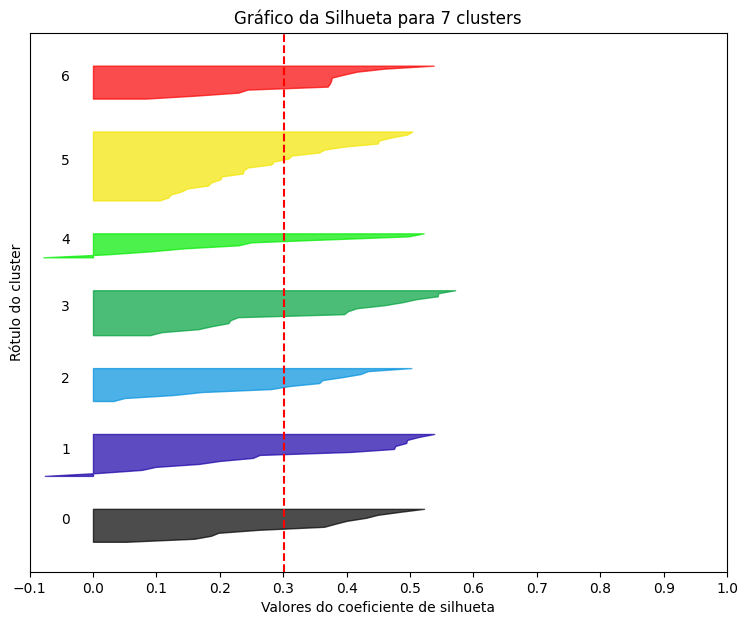

Valor médio para 8 clusters: 0.296


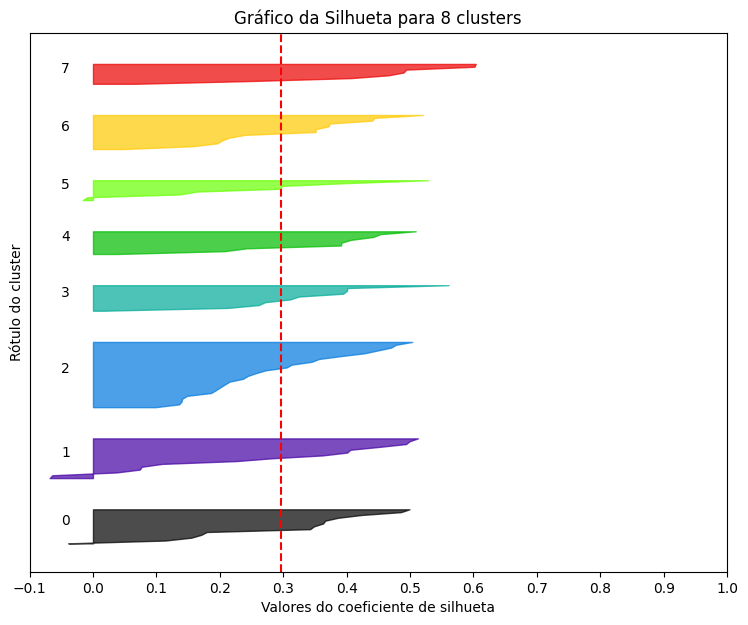

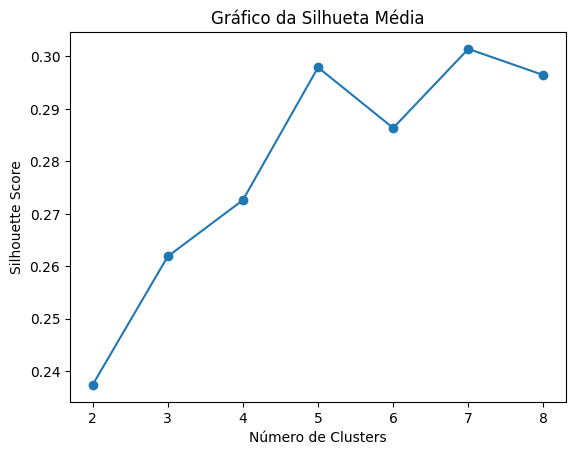

In [32]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

def graf_silhueta(n_clusters, dados_n):
    """
    Função que aplica o algoritmo KMeans com n_clusters e plota o gráfico da silhueta.
    """
    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        # Cor para cada cluster
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
                          facecolor=cor, edgecolor=cor, alpha=0.7)

        # Adiciona o número do cluster ao gráfico
        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre os clusters
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
    
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

# Calcular a silhueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 9):
    graf_silhueta(k, X_scaled)  # Chama a função graf_silhueta para cada valor de k

    # Também armazena o valor médio do Silhouette Score para cada número de clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Plotando o gráfico do Silhouette Score médio para diferentes números de clusters
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.title('Gráfico da Silhueta Média')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()


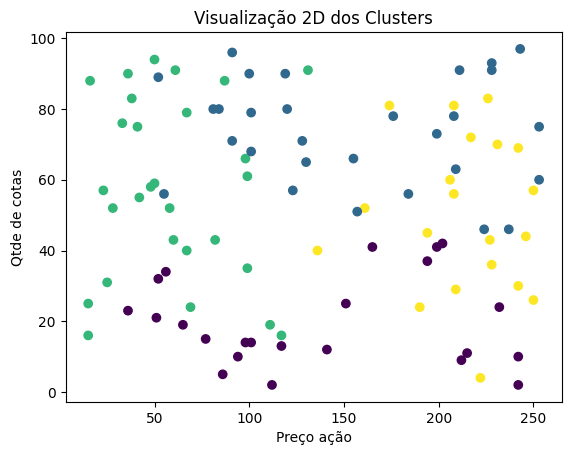

In [30]:
# Visualização 2D
plt.scatter(df['Preço ação'], df['Qtde de cotas'], c=df['Cluster'], cmap='viridis')
plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço ação')
plt.ylabel('Qtde de cotas')
plt.show()

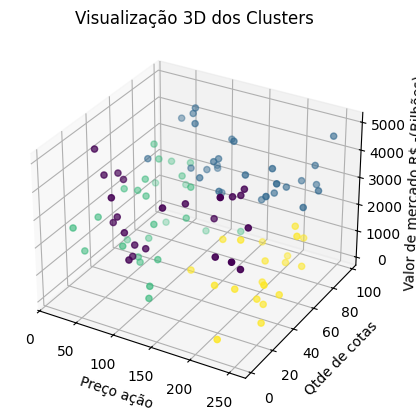

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# Visualização 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Preço ação'], df['Qtde de cotas'], df['Valor de mercado R$ -(Bilhões)'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Preço ação')
ax.set_ylabel('Qtde de cotas')
ax.set_zlabel('Valor de mercado R$ -(Bilhões)')
plt.title('Visualização 3D dos Clusters')
plt.show()
